In [5]:
!pip install tensorflow
!pip install matplotlib

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize pixel values (convert to range [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape to add a channel dimension (needed for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# Define the CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax') # 10 classes (digits 0-9)
])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5


2025-04-09 16:21:17.430729: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 [==============================] - 16s 18ms/step - loss: 0.1935 - accuracy: 0.9416 - val_loss: 0.0529 - val_accuracy: 0.9848
Epoch 2/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 3/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0359 - val_accuracy: 0.9902
Epoch 4/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 5/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0374 - val_accuracy: 0.9893


313/313 - 1s - loss: 0.0318 - accuracy: 0.9899 - 922ms/epoch - 3ms/step
Test accuracy: 0.9899


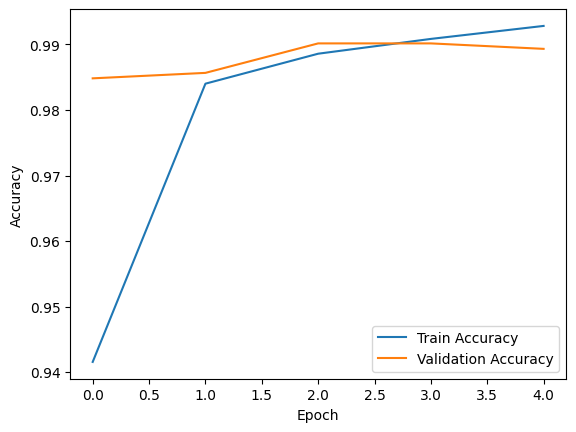

In [9]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()